# Feature scaling
- It is a technique to standardize/normalize the independent features in a data in a fixed range or scale. In other words, the methods to set feature value range within a similar scale
- Feature Scaling is one of the last steps in the whole life cycle of Feature Engineering, before Feature selection or training model.

**1. Feature Magnitude matters:**
- The `regression coefficient` is directly influenced by the scale of the variables
- Variables with bigger magnitude/value range dominate over the ones with smaller magnitude
- `Gradient decent` converges faster when features are on similar scales
- Feature scaling helps decrease the time to find vectors for `SVMs`
- Many algorithms that are base on distances (e.g. `Euclidean distances`) are sensitive to feature magitude.

**2. Algorithms affected to magnitude**
- Sensitive:
    - Linear & Logistic Regression
    - Neural Networks
    - SVM
    - KNN, Kmean
    - Linear Discriminant Analysis (LDA)
    - Principal Component Analysis (PCA)
- Insensitive: (tree-base)
    - Classification and regression tree
    - Random Forests
    - Gradient Boosted Trees

**3. Types of Feature Scaling:**
- **Rescaling**: add or subtract a constant and then multiply or divide by a constant
- **Standardization (column-wise):** subtract a measure of location and dividing by a measure of scale. 
    - Standard Scaler (*If do not understand the data, non-normal data, It works most of the times.*)
    - Min Max Scaling (*know the max and min values of the feature, like in CNN*)
    - Mean Normalization
    - Max Absolute Scaling (*Mean is closed to 0 or sparce matrix*)
    - Robust Scaling. (*the data has outliers*)
- **Normalization (row-wise):**: divide by a norm of the vector
    - Vector unit norm/lenght (*use for text-classification or clustering*)
    
(If you do not know which scaler to use, apply all and check the effect on the models.)

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette="rainbow", style="darkgrid")
%matplotlib inline

def kdeplot(var, df1, df2 = None):
    cols = 1 if df2 is None else 2
    rows = len(var) if type(var)!=str else 1
    var = var if type(var)!=str else [var]
    plt.figure(figsize=(4*cols,4*rows))
    i = 1
    for r,x in enumerate(var):
        plt.subplot(rows,cols,i)
        sns.kdeplot(data = df1[x], color="blue")
        i+=1
        if df2 is not None:
            plt.subplot(rows,cols,i)
            sns.kdeplot(data = df2[x], color="red")
            i+=1

    plt.tight_layout()
    plt.show()

2 2


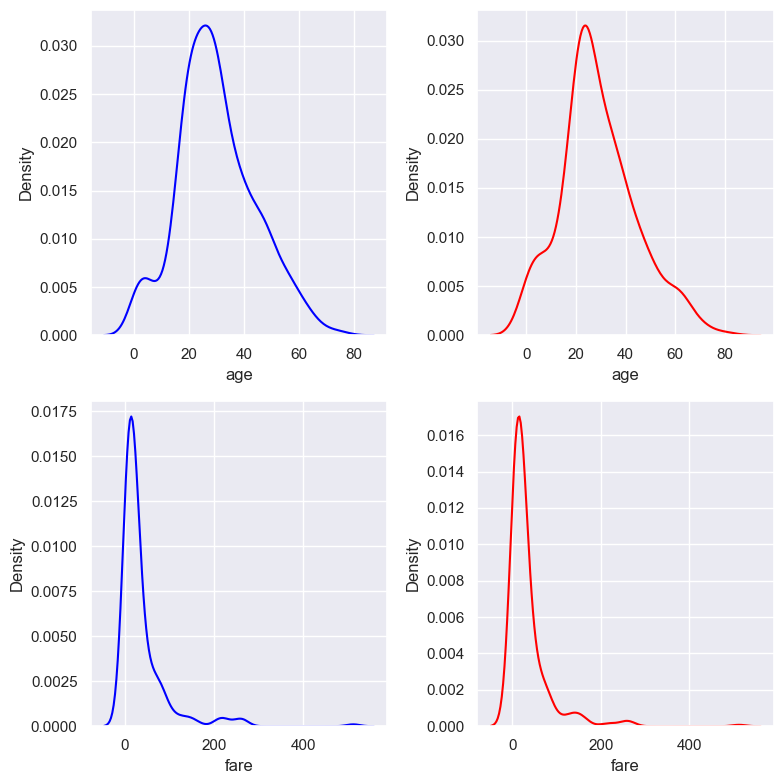

In [244]:
kdeplot(X_train.columns, X_train, X_test)

## Standardization
- Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. 
$$Z{\mathrm{score}}={\frac{X-mean(X)}{Std(X)}}$$

- After scale: 
    - `Mean(x) = 0` and `Std(X) = 1` and `Variance` = 1
    - Preserves the shape of distribution and Outliers
    - Range value change and Min/max values are vary

<img src = "_images/09scaling_standardization.png">

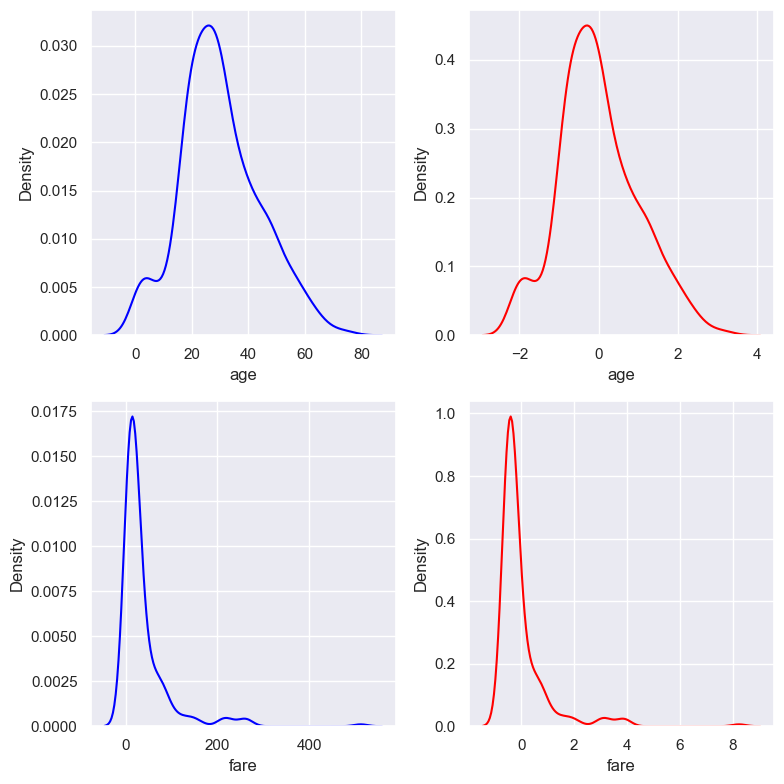

In [249]:
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler().set_output(transform='pandas')

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kdeplot(X_train.columns, X_train, X_train_scaled)

## Mean Normalisation
**x_scaled = (x - x_mean) / ( x_max - x_min)**

- After scale:
    - Mean = 0
    - Variance will be different, value range in [-1, 1]
    - May alter the shape of the original distribution, but a little bit
    - preserves outliers


In [256]:
# Sklearn does not have any specific class for mean normalization. 
# We can implement mean normalisation by combining the use of 2 transformers

# the scaler - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler_mean = StandardScaler(with_mean=True, with_std=False).set_output(transform='pandas')
scaler_minmax = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0, 100)).set_output(transform='pandas')

X_train_scaled = scaler_minmax.fit_transform(scaler_mean.fit_transform(X_train))

X_train_scaled.describe()

,age,fare
count,7.310000e+02,7.310000e+02
mean,-1.184643e-17,-1.366896e-18
std,1.854057e-01,1.124550e-01
min,-3.934165e-01,-7.372044e-02
25%,-1.210905e-01,-5.800789e-02
50%,-1.524698e-02,-4.278330e-02
75%,1.170574e-01,-1.989218e-03
max,6.065835e-01,9.262796e-01


## MinMaxScaling
**X_scaled = (X - X.min / (X.max - X.min)**

- After scale:
    - `Value range` in [0,1]
    - `Mean` is not 0, `vaiance` change
    - The `shape of distribution` would be similar to the original, but not be preserved because `Std` change and not identical.
    - Scaler would be sensitive by `outliers`
    - **Min Max Normalization will perform best when the maximum and minimum value is very distinct and known.**

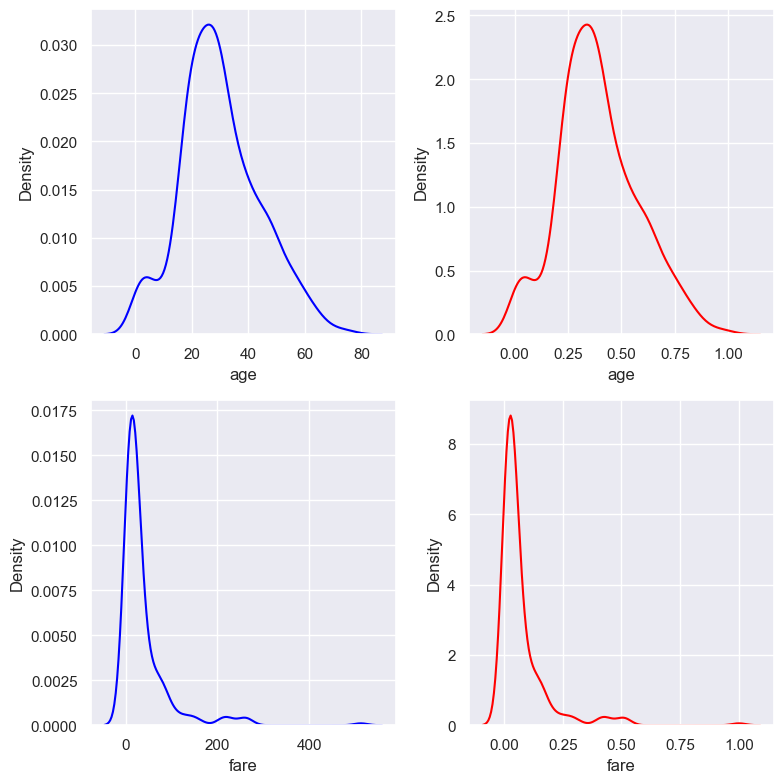

In [258]:
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
scaler = MinMaxScaler().set_output(transform='pandas')

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kdeplot(X_train.columns, X_train, X_train_scaled)

## Max Absolute Scaling

**X_scaled = X / abs(X.max)**

- `Value range` of [-1, 1]
- `Mean` not 0, `std` varies across variables
- The `shape distribution` would be similar to original
- `Scaler` is sensitive by `outliers`
- **Recommend use for `Zero-mean data` or `sparse data`.**

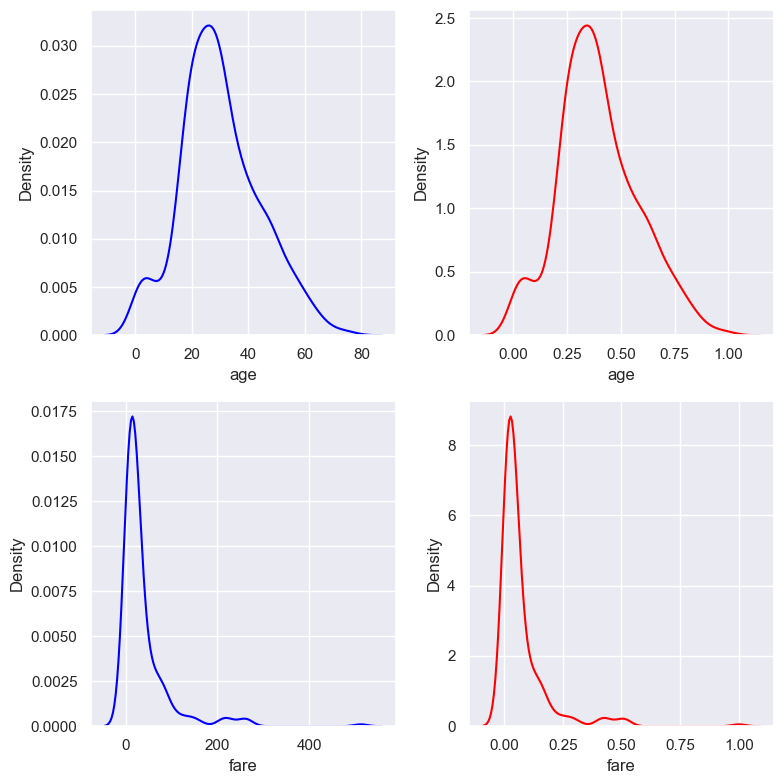

In [259]:
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# set up the scaler
scaler = MaxAbsScaler().set_output(transform='pandas')

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kdeplot(X_train.columns, X_train, X_train_scaled)

## Zero-Centering + MaxAbsScaling

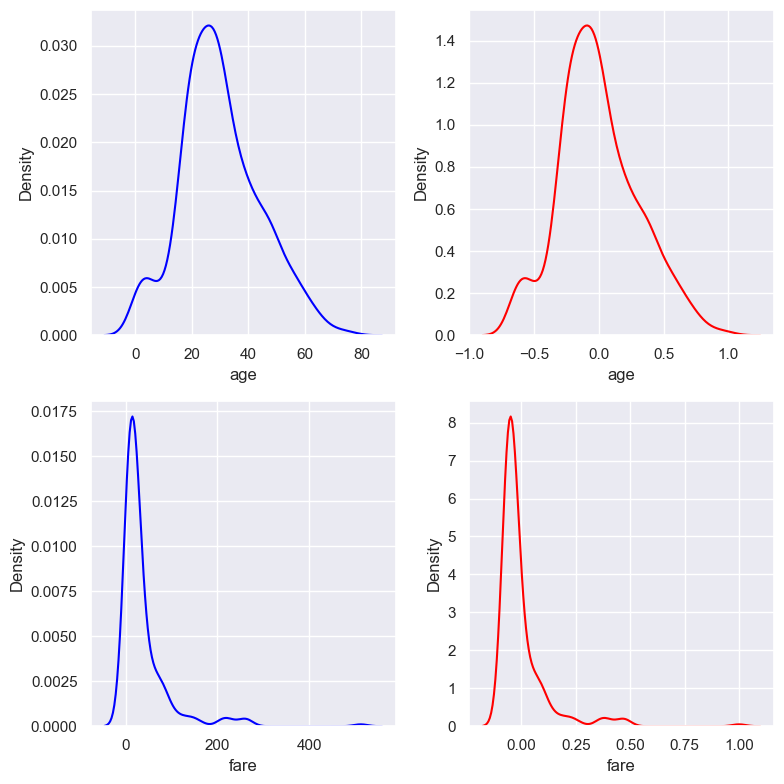

,age,fare
count,7.310000e+02,7.310000e+02
mean,-2.247784e-17,-3.037546e-18
std,3.056556e-01,1.214050e-01
min,-6.485776e-01,-7.958768e-02
25%,-1.996270e-01,-6.262460e-02
50%,-2.513582e-02,-4.618832e-02
75%,1.929782e-01,-2.147535e-03
max,1.000000e+00,1.000000e+00


In [263]:
# We can center the distributions at zero and then scale to its absolute maximum, 
# as recommended by Scikit-learn by combining the use of 2 transformers.

scaler_mean = StandardScaler(with_mean=True, with_std=False).set_output(transform='pandas')
scaler_maxabs = MaxAbsScaler().set_output(transform='pandas')

# fit the scalers to the train set, it will learn the parameters
X_train_demean = scaler_mean.fit_transform(X_train)

# we fit to the transformed data, because the maximum
# value will change with the centering
scaler_maxabs.fit(X_train_demean)

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

kdeplot(X_train.columns, X_train, X_train_scaled)

X_train_scaled.describe()

Similar effect to mean normalisation, but in this case, the values vary across a narrower range. 

## Robust Scaling
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
**X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )**

- `Median` = 0
- `Vairance` change across variables
- May be not preserves the `shape of the original distribution`
- `Max`/`Min` would be changed
- **Robust Scaling is best for data that has `outliers`**

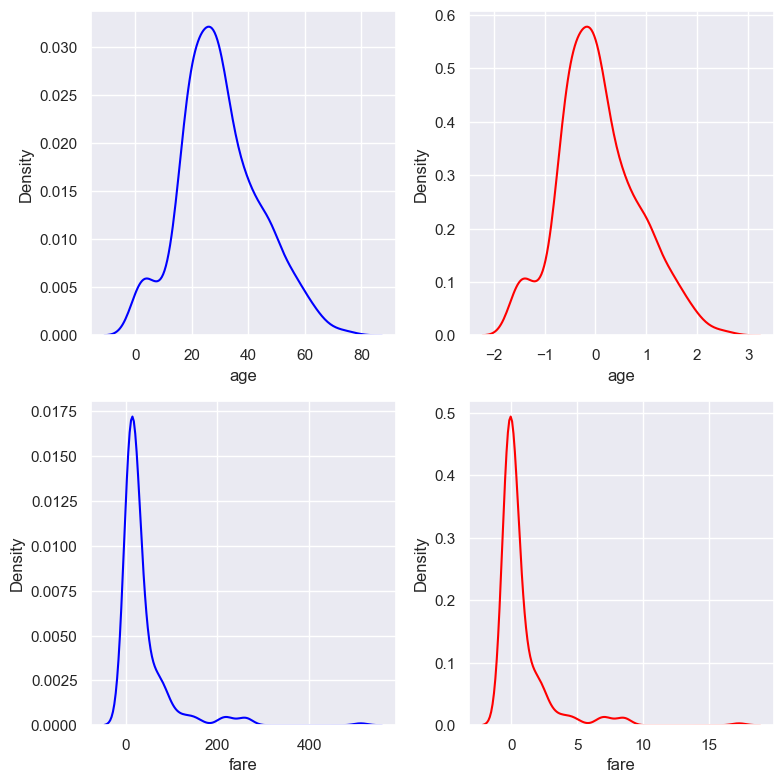

,age,fare
count,731.000000,731.000000
mean,0.064023,0.763733
std,0.778532,2.007455
min,-1.587961,-0.552265
25%,-0.444444,-0.271777
50%,0.000000,0.000000
75%,0.555556,0.728223
max,2.611111,17.298927


In [265]:
from sklearn.preprocessing import RobustScaler
# set up the scaler
scaler = RobustScaler().set_output(transform='pandas')

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kdeplot(X_train.columns, X_train, X_train_scaled)
X_train_scaled.describe()

## Unit Norm Scaling
- Scaling to unit norm is achieved by dividing each observation vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm)
- Applying for each obs independently (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.(instead of applying for feature columns like others)
- Method : `L1`, `L2`, `MaxAbs`
    - With outliers, we may prefer to use l1 normalisation.
    - The Euclidean distance (L2) is always smaller than the Manhattan distance (L1)
- After normalization by norm:
    - The shape of features (columns) distributions are quite change.
    - Each row have unit norm
- **Recommend use for text-classification, clustering, or if value of feature is more related other features in this observation rather than to the distribution of the feature**
    

In [267]:
from sklearn.preprocessing import Normalizer

# set up the scaler
scaler = Normalizer(norm='l1')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Gower's distance (mixed)
Apply a differenct distance metric to each variable depending on the type of data:
- for __numeric variables__ and __ordered factor__: manhattan distance
- for __categorical variables__: the distance is 1 with the difference of 2 values, else 0 for the equal values

__Gower Similarity__ tính trung bình partial similarities (ps) thông qua m features của 2 quan sát (khác với xét tính tương đồng thông qua 1 feature)